# Basic Monte Carlo 

##### Keywords: sampling, Monte Carlo, $\pi$

In [12]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns


## Monte Carlo

The basic idea of a Monte Carlo Algorithm is:
    to use randomness to solve what is often a deterministic problem.
    
We'll study their application in Integration.

These uses are often intertwined: optimization is needed to find modes of distributions and integration to find expectations.

## Estimate $\pi$

##### $\pi$ is defined as the area of a circle with radius 1 (circle with radius 1 is called UNIT CIRCLE)



## To estimate $\pi$ is to estimate  the area of a unit circle

If you could uniformly generate random numbers on a square of side length 2, you could ask, 
##### how many of these numbers would fall inside a unit circle embedded in and touching the midpoints of the sides of the square. 

This ratio would be

$$\frac{\pi \times 1^2}{2^2} = \frac{\pi}{4}.$$



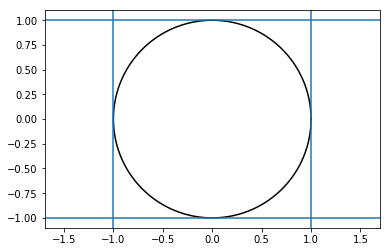

In [18]:
# Plot radius 1 circle and box around it
angles = np.linspace(0,2*np.pi,1000)

x = np.cos(angles)
y = np.sin(angles)

plt.plot(x,y,'-',color = 'black')
plt.axhline(-1)
plt.axvline(-1)
plt.axhline(1)
plt.axvline(1)

plt.xlim([-1,1])
plt.ylim([-1,1])
plt.axis('equal')

plt.show()

## Monte Carlo: sample out opints inside the square. 
## A point's coordinate:  x ~ U[-1,1], y~U[-1,1]. If (x,y) inside the unit circle, we have "acceptance" increases by one;
## In total, say, we have 1000 samples, amount these samples, we have "acceptance" many inside the unit circle, then we have the following

$$ \frac{\textit{area of unit circle}}{\textit{box area}} \approx \frac{\textit{acceptance}}{\textit{total number of samples}}$$

$$ \frac{\textit{area of unit circle}}{4} \approx \frac{\textit{acceptance}}{\textit{total number of samples}}$$

$$ \textit{area of unit circle} \approx 4\cdot\frac{\textit{acceptance}}{\textit{total number of samples}}$$

Area of the circle =  3.1456
pi =  3.141592653589793
error =  0.00400734641021


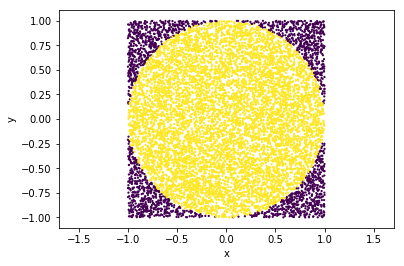

In [9]:
#area of the bounding box
box_area = 4.0    

#number of samples
N_total = 10000

#drawing random points uniform between -1 and 1
X = np.random.uniform(low=-1, high=1, size=N_total)  
Y = np.random.uniform(low=-1, high=1, size=N_total)   

# calculate the distance of the points from the center 
distance = np.sqrt(X**2+Y**2);  
 
# check if point is inside the circle    
is_point_inside = distance<1.0

# sum up the hits inside the circle
N_inside=np.sum(is_point_inside)

# estimate the circle area
circle_area = box_area * N_inside/N_total

# some nice visualization
plt.scatter(X,Y, c=is_point_inside, s=5.0, edgecolors='none')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

# text output
print("Area of the circle = ", circle_area)
print("pi = ", np.pi)
print("error = ",np.abs(np.pi-circle_area) )

## Intuitively, one might expect our estimate of $\pi$ to get better as we draw more and more samples: we are covering the areas with samples much better when we do that.

## Let's repeat the experiment for total number of samples N_total from 1000 to 100,000 with step size 5000

In [10]:
def estimate_pi(N_total):
    #drawing random points uniform between -1 and 1
    X = np.random.uniform(low=-1, high=1, size=N_total)  
    Y = np.random.uniform(low=-1, high=1, size=N_total)   

    # calculate the distance of the points from the center 
    distance = np.sqrt(X**2+Y**2);  
 
    # check if point is inside the circle    
    is_point_inside = distance<1.0

    # sum up the hits inside the circle
    N_inside=np.sum(is_point_inside)

    # estimate the circle area
    # this is an estimation of Pi
    circle_area = box_area * N_inside/N_total
    error = abs(circle_area - np.pi)
    return circle_area, error

list_n_total = np.arange(1000,int(1e6)+5000,5000)
pi_estimate  = np.zeros(len(list_n_total))
pi_error     = np.zeros(len(list_n_total))
ind = 0
for N_total in list_n_total:
    pi_estimate[ind] , pi_error[ind] = estimate_pi(N_total)
    ind+=1

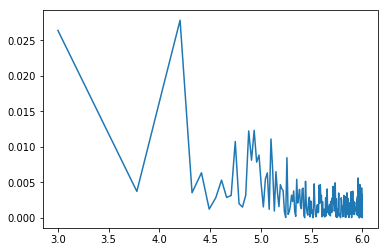

In [11]:
plt.plot(np.log10(list_n_total),(pi_error) )
plt.show()

## Lets try to think about the mathematics in the intuition which tells us that we can calculate $\pi$ in this way. 

 The area of the circle C can be obtained by computing a double integral like so:

 $$A = \int_x \int_y I_{\in C}(x, y) dx dy = \int \int_{\in C} dx dy $$

 where $I_{\in C} (x, y) = 1$ if $x,y \in C$ and $I_{\in C}(x) = 0$ if $x,y \notin C$.


 This is basically adding up all the small area elements inside the circle.

 Remember what expected value says:

 $$E_f[I_{\in C} (X,Y)] = \int I_{\in C} (X,Y) dF(X,Y) = \int_{\in C} dF(X,Y) = \int \int_{\in C} f_{X,Y} (x,y) dx dy = p(X,Y \in C)$$

 and then we can use the law of large numbers to calculate this expectation and thus this probability.

 The relationship of the expression all the way on the left to that all the way on the right is simply the law of large numbers we saw before. This is a distribution independent statement.

But the critical thing to notice is that:

$$\int \int_{\in C} f_{X,Y} (x,y) dx dy  =  \frac{1}{V} \int \int_{\in C}  dx dy = E_f[I_{\in C} (X,Y)]$$ 

once we choose a uniform distribution. Here $V$ is the support, the normalizing factor. For the circle case, this is 4 -- the area of the box. 

The expectation from the law of large numbers comes from a sequence of identically distributed bernoullis (independent of $f$ which here is uniform). All we have to do, is just like before in the law, count the frequency of samples inside.

## Hit or miss method

This simple scenario of inside-or-outside can be used as a general (but poor, as missing increases exponentially with dimension)  way to use the generation of samples to carry out integration

![](images/hitormiss.png)

You basically generate samples from a uniform distribution with support on the rectangle and see how many fall below $y(x)$ at a specific x.

This is the basic idea behind rejection sampling

#  Monte Carlo Integrals


## The basic idea

Let us formalize the basic idea behind Monte Carlo Integration in 1-D.

Consider the definite integral:

$$ I = \int_{a}^{b} g(x) \, dx $$

Then it can be written as :

$$ I =  \int_{a}^{b}(b-a)  \frac{g(x)}{(b-a)} = (b-a) \int_{a}^{b}  \frac{g(x)}{(b-a)} \, dx $$

Recall that uniform distribution between a and be has the probability density function:

$$ f_{ab}(x) = \frac{1}{b-a},x\in [a,b]$$


So the above integral $I$ can be written as:

$$ I = (b-a) E_{U[a,b]}[g(x)]$$

Note that the expected value of $f(x)$ where $x~U[a,b]$ is calculated as
$$E_{U[a,b]}[g(x)] := \int_{a}^{b} g(x)  f_{U[a,b]} dx$$

And central limit says that:

 $$E_{U[a,b]}[g(x)]= \lim_{n \to \infty} \frac{1}{N}\sum_{x_i \sim U} g(x_i)$$

### Example. 

**Calculate the integral $ I= \int_{2}^{3} [x^2 + 4 \, x \,\sin(x)] \, dx. $**

We know from calculus that the anti-derivative is 
$$ x^3/3 + 4\sin(x) -4x\cos(x). $$ 

To solve this using MC, we simply draw $N$ random numbers from 2 to 3 and then take the average of all the values $f(x)=x^2 + 4 \, x \,\sin(x)$ and normalized over the volume; this case the volume is 1 (3-2=1). 

In [33]:
def f(x):
    return x**2 + 4*x*np.sin(x) 

def intf(x): 
    return x**3/3.0+4.0*np.sin(x) - 4.0*x*np.cos(x) 

In [34]:
a = 2;    
b = 3; 

# use N draws 
N= 10000

X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
Y =f(X)   # CALCULATE THE f(x) 
V = b-a
Imc= V * np.sum(Y)/ N;

exactval=intf(b)-intf(a)

print("Monte Carlo estimation=",Imc, "Exact number=", intf(b)-intf(a))


Monte Carlo estimation= 11.796809139 Exact number= 11.8113589251


## Monte-Carlo as a function of number of samples

How does the accuracy depends on the number of points(samples)? Lets try the same 1-D integral $ I= \int_{2}^{3} [x^2 + 4 \, x \,\sin(x)] \, dx $ as a function of the number of points. 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


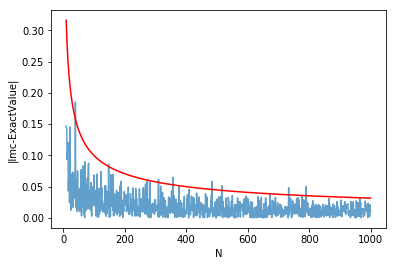

In [44]:
# to store MC estimate for each N
Imc=np.zeros(1000)

# just to store N
Na = np.linspace(0,1000,1000)

# calculus result
exactval= intf(b)-intf(a)

# for each N run monte carlo to estimate integral
for N in np.arange(0,1000):
    X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
    Y =f(X)   # CALCULATE THE f(x) 

    Imc[N]= (b-a) * np.sum(Y)/ N;
    
    
plt.plot(np.arange(10,1000),abs(Imc[10:]-exactval), alpha=0.7)#np.sqrt((Imc[10:]-exactval)**2), alpha=0.7)
plt.plot(np.arange(10,1000), 1/np.sqrt(Na[10:]), 'r')
plt.xlabel("N")
plt.ylabel("|Imc-ExactValue|")

# 
